<a href="https://colab.research.google.com/github/tetsu-miyagawa/Deep-Learning-from-Scratch/blob/master/%E3%82%BC%E3%83%AD%E3%81%8B%E3%82%89%E4%BD%9C%E3%82%8BDeep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第１章 Python入門

## 単純なグラフの描画

In [0]:
import numpy as np
import matplotlib.pyplot as plt

データの作成

In [0]:
x = np.arange(0, 6, 0.1)
y = np.sin(x)

グラフの描画

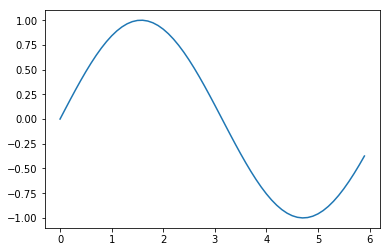

In [3]:
plt.plot(x, y)
plt.show()

## pyplotの機能
データの作成

In [0]:
x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

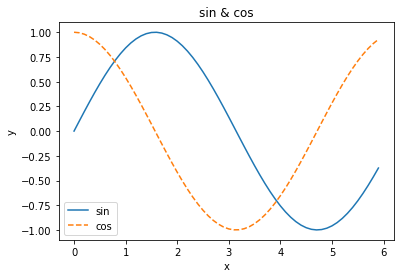

In [5]:
plt.plot(x, y1, label='sin')
plt.plot(x, y2, linestyle='--', label='cos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin & cos')
plt.legend()
plt.show()

## 画像の表示

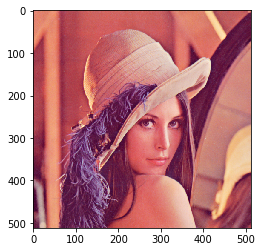

In [6]:
import urllib.request
from matplotlib.image import imread

urllib.request.urlretrieve('http://optipng.sourceforge.net/pngtech/img/lena.png', 'lena.png')

img = imread('lena.png')
plt.imshow(img)
plt.show()

# 第２章 パーセプトロン

In [0]:
def ANDv1(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1 * w1 + x2 * w2
  if tmp <= theta:
    return 0
  else:
    return 1

In [8]:
print(ANDv1(0, 0))
print(ANDv1(1, 0))
print(ANDv1(0, 1))
print(ANDv1(1, 1))

0
0
0
1


In [0]:
import numpy as np

def ANDv2(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w * x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [10]:
print(ANDv2(0, 0))
print(ANDv2(1, 0))
print(ANDv2(0, 1))
print(ANDv2(1, 1))

0
0
0
1


In [0]:
def NANDv1(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7
  tmp = np.sum(w * x) + b
  if tmp <= 0:
    return 0
  else:
    return 1
  
def ORv1(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w * x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [12]:
print(NANDv1(0, 0))
print(NANDv1(0, 1))
print(NANDv1(1, 0))
print(NANDv1(1, 1))
print(ORv1(0, 0))
print(ORv1(0, 1))
print(ORv1(1, 0))
print(ORv1(1, 1))

1
1
1
0
0
1
1
1


In [0]:
def XORv1(x1, x2):
  s1 = NANDv1(x1, x2)
  s2 = ORv1(x1, x2)
  y = ANDv2(s1, s2)
  return y

In [14]:
print(XORv1(0, 0))
print(XORv1(0, 1))
print(XORv1(1, 0))
print(XORv1(1, 1))

0
1
1
0


# 第３章 ニューラルネットワーク

## 3.2 活性化関数

### 3.2.1 シグモイド関数
$$
h(x) = \frac{1}{1 + exp(-x)}
$$

### 3.2.3 ステップ関数のグラフ

In [0]:
def step_function(x):
  return np.array(x > 0, dtype=np.int)

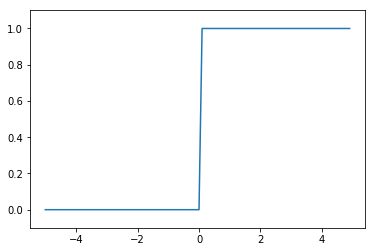

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 シグモイド関数の実装

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [18]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

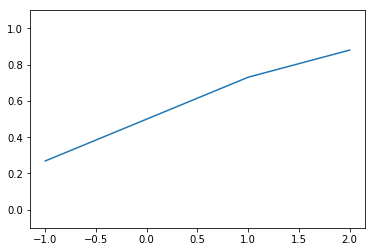

In [19]:

y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 シグモイド関数とステップ関数の比較

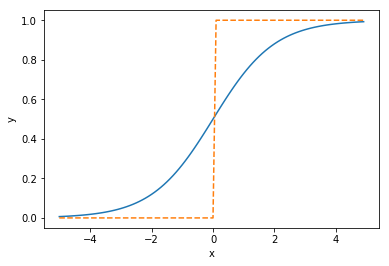

In [20]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)
plt.plot(x, y1)
plt.plot(x, y2, linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 3.2.7 ReLU関数

In [0]:
def relu(x):
  return np.maximum(0, x)

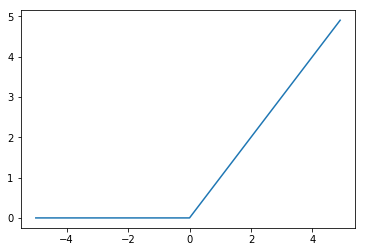

In [22]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

## 3.3 多次元配列の計算

In [23]:
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [24]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [25]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [26]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
print(np.dot(A, B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [27]:
C = np.array([[1, 2], [3, 4]])
print(C.shape)
print(A.shape)
#print(np.dot(A, C))

(2, 2)
(2, 3)


In [28]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)
B = np.array([7, 8])
print(B.shape)
print(np.dot(A, B))

(3, 2)
(2,)
[23 53 83]


### 3.3.3 ニューラルネットワークの行列の積

In [29]:
X = np.array([1, 2])
print(X.shape)

W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3.4 ３層ニューラルネットワークの実装

In [30]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [31]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


In [32]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z2)

(3,)
(3, 2)
(2,)
[ 0.62624937  0.7710107 ]


In [0]:
def identity_function(x):
  return x

In [34]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

print(Y)

[ 0.31682708  0.69627909]


### 3.4.3 実装のまとめ

In [35]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])
  
  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']
  
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)
  
  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.31682708  0.69627909]


### 3.5.1 恒等関数とソフトマックス関数

$$
y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)}
$$

In [36]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]


In [0]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  
  return y

### 3.5.2 ソフトマックス関数の実装上の注意

In [38]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print(a - c)

print(np.exp(a - c) / np.sum(np.exp(a - c)))

[ nan  nan  nan]
[  0 -10 -20]
[  9.99954600e-01   4.53978686e-05   2.06106005e-09]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [0]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  
  return y

### 3.5.3 ソフトマックス関数の特徴

In [40]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[ 0.01821127  0.24519181  0.73659691]
1.0


## 3.6 手書き文字認識

In [0]:
import urllib.request
import gzip

def download_to_np(url, file, func):
  urllib.request.urlretrieve(url + file, file)
  return func(file)


def read_image(file):
  with gzip.open(file, 'rb') as f:
    data = np.frombuffer(f.read(), np.uint8, offset=16)
  return data.reshape(-1, 784)


def read_label(file):
  with gzip.open(file, 'rb') as f:
    return np.frombuffer(f.read(), np.uint8, offset=8)

  
def change_one_hot_label(X):
  T = np.zeros((X.size, 10))
  for idx, row in enumerate(T):
    row[X[idx]] = 1
  return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
  dataset = {}
  url_base = 'http://yann.lecun.com/exdb/mnist/'
  for key, (file, func) in {
    'train_img': ('train-images-idx3-ubyte.gz', read_image),
    'train_label': ('train-labels-idx1-ubyte.gz', read_label),
    'test_img': ('t10k-images-idx3-ubyte.gz', read_image),
    'test_label': ('t10k-labels-idx1-ubyte.gz', read_label)}.items():
    dataset[key] = download_to_np(url_base, file, func)
 
  if normalize:
    for key in ('train_img', 'test_img'):
      dataset[key] = dataset[key].astype(np.float32)
      dataset[key] /= 255.0

  if one_hot_label:
    dataset['train_label'] = change_one_hot_label(dataset['train_label'])
    dataset['test_label'] = change_one_hot_label(dataset['test_label'])

  if not flatten:
    for key in ('train_img', 'test_img'):
      dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

  return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])

5
(784,)
(28, 28)


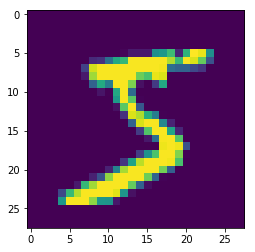

In [42]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

plt.imshow(img)

### 3.6.2 ニューラルネットワークの推論処理



In [43]:
urllib.request.urlretrieve('https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch03/sample_weight.pkl?raw=true', 'sample_weight.pkl')

import os
print(os.listdir(path='.'))

['.bashrc', '.profile', '.bash_logout', '.cache', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz', '=0.0.1a3', 'train-labels-idx1-ubyte.gz', '.ipython', '.jupyter', 'train-images-idx3-ubyte.gz', 'sample_weight.pkl', 'lena.png', '.local', '.config', '.conda', '.yarn', 'work']


In [0]:
import pickle


def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True,
                                                    flatten=True,
                                                    one_hot_label=False)
  return x_test, t_test


def init_network():
  with open('sample_weight.pkl', 'rb') as f:
    network = pickle.load(f)
  return network


def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']
  
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)
  
  return y

In [45]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)
  if p == t[i]:
    accuracy_cnt += 1
print('Accuracy: ' + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


### 3.6.3 バッチ処理

In [46]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print('x.shape: {}'.format(x.shape))
print('x[0].shape: {}'.format(x[0].shape))
print('W1.shape: {}'.format(W1.shape))
print('W2.shape: {}'.format(W2.shape))
print('W3.shape: {}'.format(W3.shape))

x.shape: (10000, 784)
x[0].shape: (784,)
W1.shape: (784, 50)
W2.shape: (50, 100)
W3.shape: (100, 10)


In [47]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])
  
print('Accuracy: {}'.format(float(accuracy_cnt / len(x))))

Accuracy: 0.9352


np.argmax()のaxis=1の挙動

In [48]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
print(np.argmax(x, axis=0))
print(np.argmax(x, axis=1))

[3 0 1]
[1 2 1 0]


axis=0の時は、各列ベクトルで内の最大要素のインデックス、axis=1の場合は各行ベクトル内。バッチ処理の場合はaxis=0は各バッチ毎に列方向に並ぶので、一つのバッチ内の最大値を求めるには行ベクトル側すなわちaxis=1で探す。

# 4章 ニューラルネットワークの学習

## 4.2 損失関数
### 4.2.1 二乗和誤差
$$
E = \frac{1}{2}\sum_{k} (y_k - t_k)^2
$$

In [0]:
def mean_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [50]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.0975


In [51]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.5975


### 4.2.2 交差エントロピー誤差
$$
E = - \sum_k t_k \log y_k
$$

In [0]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

In [53]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099


In [54]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

2.30258409299


### 4.2.4 [バッチ対応版] 交差エントロピー誤差

In [0]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
    
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

yやtの次元が1の場合、つまりミニバッチではなく一つのデータだけpredictした場合は、バッチサイズを1とした行列に変換する。

In [56]:
y = np.array([1, 2, 3])
print('y.shape: {}'.format(y.shape))

y = y.reshape(1, y.size)
print('y.shape: {}'.format(y.shape))

y.shape: (3,)
y.shape: (1, 3)


### 4.3.1 微分

In [0]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)

In [0]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

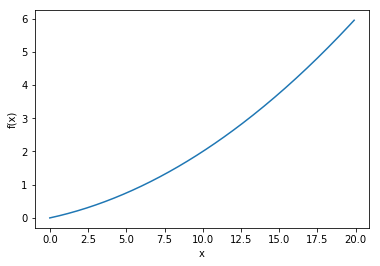

In [59]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [60]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


`function_2()`は$x_0$の配列、$x_1$の配列を含んだ２次元の配列`x`を受けて、$y$の配列を返す。

In [0]:
def function_2(x):
  #return x[0]**2 + x[1]**2
  return np.sum(x**2, axis=0)

`np.sum`を使う場合、0次元方向にのみ和を取らないと全部を足してしまってスカラーになってしまう。本には`axis=0`が抜けている。

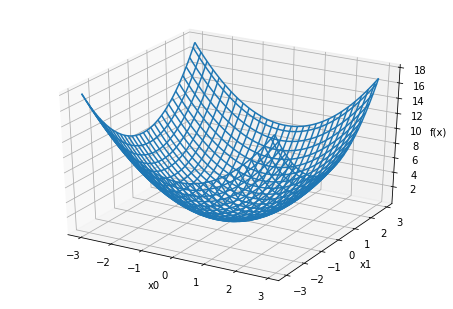

In [62]:
from mpl_toolkits.mplot3d import Axes3D

x0 = np.arange(-3.0, 3.0, 0.1)
x1 = np.arange(-3.0, 3.0, 0.1)

X0, X1 = np.meshgrid(x0, x1)

y = function_2(np.array([X0, X1]))

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_zlabel("f(x)")

ax.plot_wireframe(X0, X1, y)
plt.show()

In [63]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

6.00000000000378


In [64]:
def function_tmp2(x1):
  return 3.0**2 + x1 * x1

print(numerical_diff(function_tmp2, 4.0))

7.999999999999119


## 4.4 勾配

変数は$x, y, z, ...$ではなく$x_0, x_1, x_2 ...$

`numerical_gradient()`は関数`f`について$x_0$（配列）、$x_1$（配列）の各点に於けるそれぞれの偏微分の組みを返す。

`f()`は$x_0$の配列、$x_1$の配列を含んだ２次元の配列`x`を受けて、$y$の配列を返す。

In [0]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.shape[0]):
    x[idx] += h
    fxh1 = f(x)
    
    x[idx] -= 2 * h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] += h

  return grad

本のコードはスライスとビューの問題を含んでいる。
```
tmp_val = x[idx]
```
は元の値をコピーしていないので、最初の
```
x[idx] = tmp_val + h
```
は規定通り動作するが、次の
```
x[idx] = tmp_val - h
```
は`tmp_val`も書き換わってしまっているので期待通りの動作をしない。簡単にやるにはそのままhを足して、2hを引いて、もう一度hを足して元に戻す。


`for`ループはxに入っている変数の数（$x_0$、$x_1$とか）なので`x.size`では合わない。0次元目の要素数。

In [66]:
print(function_2(np.array([[3.0], [4.0]])))
print(numerical_gradient(function_2, np.array([[3.0, 0.0, 3.0], [4.0, 2.0, 0.0]])))

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[ 25.]
[[ 6.  0.  6.]
 [ 8.  4.  0.]]
[ 6.  8.]
[ 0.  4.]
[ 6.  0.]


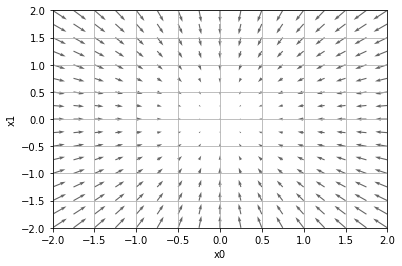

In [67]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X0, X1 = np.meshgrid(x0, x1)

X0 = X0.flatten()
X1 = X1.flatten()

grad = numerical_gradient(function_2, np.array([X0, X1]))

plt.figure()
plt.quiver(X0, X1, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

### 4.4.1 勾配法

In [0]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  
  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
  
  return x

ここでもxは各変数の値の配列なので2次元配列で受け取れるが、各変数の値のみの1次元配列でも良い。その場合はその点での各変数に対する偏微分の配列が一つだけ帰って来る。

In [69]:
init_x = np.array([-3.0, 4.0]) # 一つの点
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

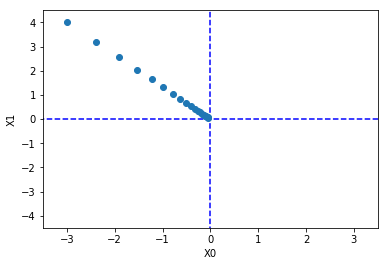

In [70]:
def gradient_descent_h(f, init_x, lr=0.01, step_num=100):
  x = init_x
  x_history = []

  for i in range(step_num):
    x_history.append( x.copy() )

    grad = numerical_gradient(f, x)
    x -= lr * grad

  return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent_h(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

学習率が適切でない例

In [71]:
gradient_descent(function_2, init_x=np.array([-3.0, 4.0]), lr=10.0, step_num=100)

array([ -2.58983739e+13,   2.55482962e+13])

In [72]:
gradient_descent(function_2, init_x=np.array([-3.0, 4.0]), lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

> 学習率の様なハイパーパラメータは人の手によって設定されるパラメータ。一般的にはこのハイパーパラメータを色々な値で試しながら、うまく学習できるケースを探すという作業が必要になります。


手作業な部分は人に蓄積された経験とノウハウ。

### 4.4.2 ニューラルネットワークに対する勾配

In [0]:
class SimpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3)
  
  def predict(self, x):
    return np.dot(x, self.W)
  
  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)
    return loss

In [94]:
net = SimpleNet()
print(net.W)

[[ 0.18849419  1.84028398 -0.11417203]
 [-0.17002863  0.57395293  0.25207081]]


In [95]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

t = np.array([0, 0, 1])
net.loss(x, t)

[-0.03992925  1.62072802  0.15836051]
1


1.8142210512395915

`numerical_gradient()`を呼び出す所はやや分かりにくい。ある入力（x）と正解データ（t）の組みに対するloss関数の値に対する、Wの各要素の偏微分を求める。`numerical_gradient()`は第１引数の件数に少しだけ値を変えた第２引数（仮引数名はxだが本来はnet.W）を渡す。loss関数の引数はある入力（x）と正解データ（t）の組みで変化はないが、loss関数内で呼び出すpredictの出力がWの変化によって少し変わる筈。なので、`numerical_gradient()`はだに２引数のxを直接変更出来なければならない。

ここでは`numerical_gradient()`は多次元版を使用しなければならない。$x_0, x_1,...$と変数が1次元に並んでいるのではなく、$x_{00}, x_{01}, ..., x_{10}, x_{11}, ...$の様に2次元に並んでいて、それぞれのパラメータのみを変更した時の微分を計算するため。

In [96]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        #x[idx] += h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        #x[idx] -= 2 * h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        #x[idx] += h

        it.iternext()   
        
    return grad


dW = numerical_gradient(lambda w: net.loss(x, t), net.W)
print(dW)

[[ 0.08019151  0.42202936 -0.50222087]
 [ 0.12028726  0.63304405 -0.75333131]]


## 4.5 学習アルゴリズムの実装
### 4.5.1 ２層ニューラルネットワークのクラス

関数softmaxとcross_entropy_errorをバッチ処理用に変更する必要がある。本来入力はベクトル。バッチ処理の場合2次元配列（バッチ数×出力数）になっている。

In [0]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

本のコードは転置してaxis=0で

In [0]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)
    
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)
    
    return y
  
  def loss(self, x, t):
    y = self.predict(x)
    return cross_entropy_error(y, t)
  
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)
    
    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy
  
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)
    
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    
    return grads

In [98]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [99]:
y = net.predict(np.random.rand(100, 784))
print('y.shape: {}'.format(y.shape))

y.shape: (100, 10)


In [100]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)
grads = net.numerical_gradient(x, t)
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


リモートで、1枚の計算で17.5秒、10枚は59秒、100枚は202秒=3.3分。

ローカルだと、1枚の計算に8.3秒、10枚で22秒、100枚は67秒。

### 4.5.2 ミニバッチ学習の実装
現在のColaboratoryだと100枚のバッチを１階計算するのにおよそ80秒掛かる。ローカルでは平均41秒。10000回も回してられないからせめて600回（１エポック）。

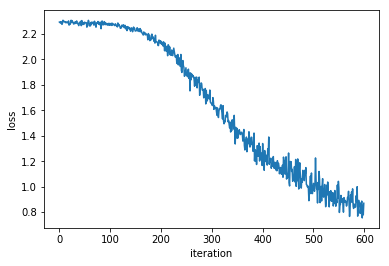

In [114]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 600
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  
  grad = network.numerical_gradient(x_batch, t_batch)
  
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
  
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)
  #print('{}: {}'.format(i, loss))

x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

それでも26469.5秒=7時間20分。
本のグラフとは損失の初期値もグラフの下がり具合も全く異なる。

Webにこの本の記事は沢山あるが、ここの部分を実際にやってる人は数える程しかいない。で、この人はかなりガッツリやってみたっぽい。

https://www.slideshare.net/KCSKeioComputerSocie/deeplearning-4-95329938

これを見ると最初から急速に損失が減る訳ではなさそう。また、損失の初期値も同じくらいなので取り敢えずこれで良しとする。

### 4.5.3 テストデータで評価

train acc = 0.08936666666666666, test acc = 0.0894
train acc = 0.7867333333333333, test acc = 0.7932
train acc = 0.8755166666666667, test acc = 0.8822
train acc = 0.897, test acc = 0.901
train acc = 0.9084, test acc = 0.9108
train acc = 0.9151166666666667, test acc = 0.9172
train acc = 0.9199833333333334, test acc = 0.9207
train acc = 0.9236, test acc = 0.9245
train acc = 0.9280666666666667, test acc = 0.9294


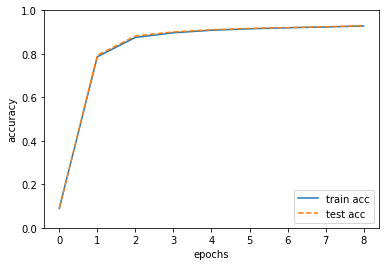

In [120]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 4800
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

def print_acc():
  global train_acc_list, test_acc_list
  
  train_acc = network.accuracy(x_train, t_train)
  test_acc = network.accuracy(x_test, t_test)
  train_acc_list.append(train_acc)
  test_acc_list.append(test_acc)
  print("train acc = {}, test acc = {}".format(train_acc, test_acc))

print_acc()

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  
  grad = network.numerical_gradient(x_batch, t_batch)
  
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
  
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)
  
  if (i + 1) % iter_per_epoch == 0:
    print_acc()

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

３時間回す。平均45秒として240回まわせる。

実際には9358秒=2.6時間。１回あたり40秒だった。
600回が１エポック。これに掛かる時間は400分〜450分。48時間掛けると、7エポック=4200回。8エポック行くと4800回=60時間。
8エポックに54.5時間を要した。

# ５章 誤差逆伝播法

## 5.1 計算グラフ
### 5.1.3 なぜ計算グラフで解くのか？
図5-5の意味は、支払金額$L$に対するリンゴの単価$x$の偏微分、すなわち支払金額の変化はリンゴの単価変化の2.2倍である事を意味している。リンゴの単価が101円になると、2個買うので税抜き価格が202円、消費税1.1倍すると222.2円。つまり、元の220円から2.2円増える事を意味している。

図ではリンゴの位置に「2.2」と書かれているが、2.2の影響を受けるのは一番右の支払い金額である。

図5-14に示されている通り、例えば消費税が0.1増えるて1.2になると、支払い金額は$200 \times 1.2 = 240$となり支払い金額は20円増える。つまり消費税の支払い金額に対する偏微分は200となる。

## 5.4 単純なレイヤの実装

### 5.4.1 乗算レイヤの実装

In [0]:
class MulLayer:
  def __init__(self):
    self.x = None
    self.y = None
  
  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y
    return out
  
  def backward(self, dout):
    dx = dout * self.y
    dy = dout * self.x
    return dx, dy

In [138]:
class BuyApple:
  def __init__(self):
    self.mul_apple_layer = MulLayer()
    self.mul_tax_layer = MulLayer()

  def forward(self, apple, apple_num, tax):
    apple_price = self.mul_apple_layer.forward(apple, apple_num)
    return self.mul_tax_layer.forward(apple_price, tax)

  def backward(self, dprice):
    dapple_price, dtax = self.mul_tax_layer.backward(dprice)
    return self.mul_apple_layer.backward(dapple_price)

buy = BuyApple()
price = buy.forward(apple=100.0, apple_num=2, tax=1.1)
print('price = {}'.format(price))

dapple, dapple_num = buy.backward(dprice=1)
print('dapple = {}, dapple_num = {}'.format(dapple, dapple_num))

price = 220.00000000000003
dapple = 2.2, dapple_num = 110.00000000000001


### 5.4.2 加算レイヤの実装

In [0]:
class AddLayer:
  def __init__(self):
    pass
  
  def forward(self, x, y):
    out = x + y
    return out
  
  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1
    return dx, dy

In [142]:
def buy_apple_and_orange():
  apple = 100
  apple_num = 2
  orange = 150
  orange_num = 3
  tax = 1.1
  
  mul_apple_layer = MulLayer()
  mul_orange_layer = MulLayer()
  add_apple_orange_layer = AddLayer()
  mul_tax_layer = MulLayer()
  
  apple_price = mul_apple_layer.forward(apple, apple_num)
  orange_price = mul_orange_layer.forward(orange, orange_num)
  all_price = add_apple_orange_layer.forward(apple_price, orange_price)
  price = mul_tax_layer.forward(all_price, tax)
  
  dprice = 1
  dall_price, dtax = mul_tax_layer.backward(dprice)
  dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
  dorange, dorange_num = mul_orange_layer.backward(dorange_price)
  dapple, dapple_num = mul_apple_layer.backward(dapple_price)
  
  print('price = {}'.format(price))
  print('dapple = {}, dapple_num = {}, dorange = {}, dorange_num = {}, dtax = {}'.format(dapple, dapple_num, dorange, dorange_num, dtax))

buy_apple_and_orange()

price = 715.0000000000001
dapple = 2.2, dapple_num = 110.00000000000001, dorange = 3.3000000000000003, dorange_num = 165.0, dtax = 650


## 5.5 活性化関数レイヤの実装

### 5.5.1 ReLUレイヤ

In [0]:
class ReLU:
  def __init__(self):
    self.mask = None
  
  def forward(self, x):
    self.mask = (x <= 0)
    out = x.copy()
    out[self.mask] = 0
    return out
  
  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

### 5.5.2 Sigmoidレイヤ

$$
\begin{eqnarray}
\frac{\partial L}{\partial y}y^2 \exp(-x) &=& \frac{\partial L}{\partial y}\frac{1}{(1+\exp(-x))^2} \exp(-x) \\
&=& \frac{\partial L}{\partial y}\frac{1}{1 + \exp(-x)}\frac{\exp(-x)}{1 + \exp(-x)} \\
&=& \frac{\partial L}{\partial y}\frac{1}{1 + \exp(-x)}\frac{(1 + \exp(-x)) - 1}{1 + \exp(-x)} \\
&=& \frac{\partial L}{\partial y}\frac{1}{1 + \exp(-x)}\left(\frac{1 + \exp(-x)}{1 + \exp(-x)} - \frac{1}{1 + \exp(-x)}\right) \\
&=& \frac{\partial L}{\partial y}\frac{1}{1 + \exp(-x)}\left(1 - \frac{1}{1 + \exp(-x)}\right) \\
&=& \frac{\partial L}{\partial y}y\left(1 - y\right) 
\end{eqnarray}
$$

In [0]:
class Sigmoid:
  def __init__(self):
    self.out = None
  
  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    self.out = out
    
    return out
  
  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out
    return dx

## 5.6 Affine / Softmaxレイヤの実装
### 5.6.1 Affineレイヤ

In [0]:
class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    self.x = None
    self.dW = None
    self.db = None
  
  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b
    return out
  
  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)
    return dx

詳細な理屈は難しいが、バイアス$B$を足す部分ではブロードキャストされていて、実際にはバッチサイズと同じ数の行数を持つ$B$の行列が足されている。このブロードキャストを逆伝播（あるいは微分）する事が意味するものが何なのかが分からない。本ではこれを「集約」されると表現して加算している。

### 5.6.3 Softmax-with-Lossレイヤ

In [0]:
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None
    self.y = None
    self.t = None
  
  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)
    return self.loss
  
  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size
    return dx

## 5.7 誤差逆伝播法の実装

### 5.7.2 誤差逆伝播法に対応したニューラルネットワークの実装

In [0]:
from collections import OrderedDict

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)
    
    self.layers = OrderedDict()
    self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
    self.layers['Relu1'] = ReLU()
    self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
    self.lastLayer = SoftmaxWithLoss()
    
  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)
    return x
  
  def loss(self, x, t):
    y = self.predict(x)
    return self.lastLayer.forward(y, t)
  
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    if t.ndim != 1:
      t = np.argmax(t, axis=1)
    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy
  
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    return grads
  
  def gradient(self, x, t):
    self.loss(x, t)
    
    dout = 1
    dout = self.lastLayer.backward(dout)
    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)
    
    grads = {}
    grads['W1'] = self.layers['Affine1'].dW
    grads['b1'] = self.layers['Affine1'].db
    grads['W2'] = self.layers['Affine2'].dW
    grads['b2'] = self.layers['Affine2'].db
    return grads

### 5.7.3 誤差逆伝播法の勾配確認

In [162]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
x_batch = x_train[:3]
t_batch = t_train[:3]
grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
  diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
  print(key + ': ' + str(diff))

W1: 4.6207610641e-10
b1: 2.96557660346e-09
W2: 4.74473914037e-09
b2: 1.39596143608e-07


ちょっと誤差が大きいか？

### 5.7.4 誤差逆伝播法を使った学習

train acc = 0.14961666666666668, test acc = 0.1544
loss = 0.20021309717373825
train acc = 0.9073833333333333, test acc = 0.9103
loss = 0.1788221598068805
train acc = 0.92375, test acc = 0.9263
loss = 0.25808764149927493
train acc = 0.93665, test acc = 0.9368
loss = 0.10283411610858711
train acc = 0.9444, test acc = 0.9406
loss = 0.1072336128392881
train acc = 0.9508333333333333, test acc = 0.9475
loss = 0.09391971941445731
train acc = 0.9556666666666667, test acc = 0.9505
loss = 0.11128738519407644
train acc = 0.95905, test acc = 0.9547
loss = 0.17488614460459162
train acc = 0.9631166666666666, test acc = 0.9567
loss = 0.0663138252194507
train acc = 0.9659166666666666, test acc = 0.9595
loss = 0.11702445463772303
train acc = 0.96885, test acc = 0.9622
loss = 0.05191973739368418
train acc = 0.9716, test acc = 0.9647
loss = 0.03155588151597073
train acc = 0.9727, test acc = 0.9664
loss = 0.08795524055838104
train acc = 0.9734666666666667, test acc = 0.9665
loss = 0.04883390964012
train a

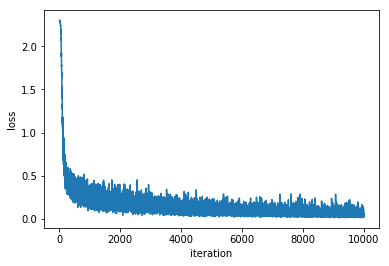

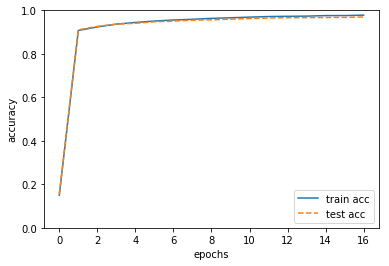

In [176]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

def print_acc():
  global train_acc_list, test_acc_list
  
  train_acc = network.accuracy(x_train, t_train)
  test_acc = network.accuracy(x_test, t_test)
  train_acc_list.append(train_acc)
  test_acc_list.append(test_acc)
  print("train acc = {}, test acc = {}".format(train_acc, test_acc))

print_acc()

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  
  grad = network.gradient(x_batch, t_batch)
  
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
  
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)
  
  if (i + 1) % iter_per_epoch == 0:
    print('loss = {}'.format(train_loss_list[-1]))
    print_acc()

x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

勾配法で4800回計算させるのに193472秒（54時間）とか掛かっていた物が、倍以上の10000回が80秒弱。およそ5000倍早い。MNISTのダウンロードの時間が大きな割合を占めるので計算はもっと速いはず。

# 第６章 学習に関するテクニック
## 6.1 パラメータの更新
### 6.1.2 SGD


In [0]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr
  
  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

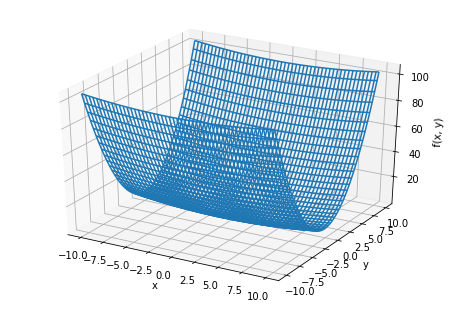

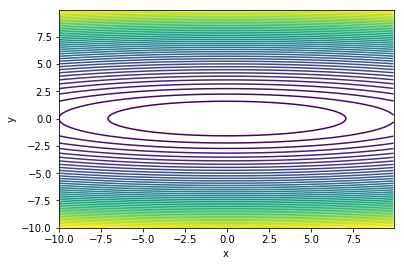

In [199]:
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
  return x**2 / 20.0 + y**2

x = np.arange(-10.0, 10.0, 0.1)
y = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.plot_wireframe(X, Y, Z)
plt.show()

plt.contour(X, Y, Z, 50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

$$
f(x, y) = \frac{1}{20}x^2+y^2
$$

$$
\frac{\partial f}{\partial x} = \frac{2}{20}x
$$
$$
\frac{\partial f}{\partial y} = 2y
$$

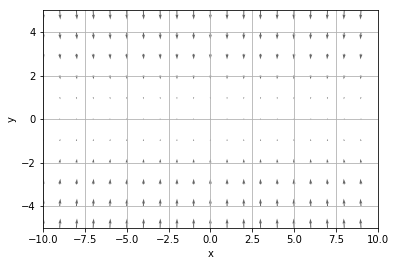

In [200]:
def df(x, y):
    return x / 10.0, 2.0*y

x = np.arange(-10.0, 10.0, 1)
y = np.arange(-10.0, 10.0, 1)
X, Y = np.meshgrid(x, y)
dx, dy = df(X, Y)

plt.figure()
plt.quiver(X, Y, -dx, -dy,  angles="xy",color="#666666")
plt.xlim([-10, 10])
plt.ylim([-5, 5])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.draw()
plt.show()

In [0]:
def draw_optimizing_graph(f, name, x_history, y_history):
  x = np.arange(-10, 10, 0.01)
  y = np.arange(-5, 5, 0.01)

  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)

  # for simple contour line
  mask = Z > 7
  Z[mask] = 0

  # plot
  plt.plot(x_history, y_history, 'o-', color="red")
  plt.contour(X, Y, Z)
  plt.ylim(-10, 10)
  plt.xlim(-10, 10)
  plt.plot(0, 0, '+')
  plt.title(name)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

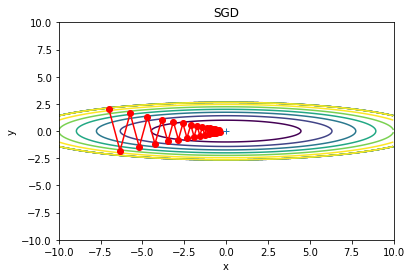

In [208]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizer = SGD(lr=0.95)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]

for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])

    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)

draw_optimizing_graph(f, 'SGD', x_history, y_history)

### 6.1.4 Momentum

In [0]:
class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None
  
  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)
    for key in params.keys():
      self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
      params[key] += self.v[key]

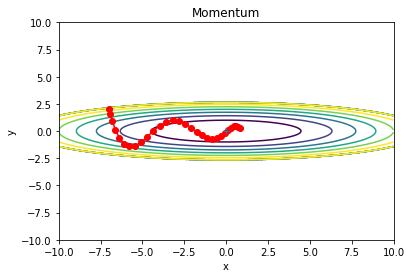

In [213]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizer = Momentum(lr=0.1)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]

for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])

    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)

draw_optimizing_graph(f, 'Momentum', x_history, y_history)

SGDと同じ繰り返し回数だと最小点を通り過ぎてしまう。50回まで繰り返すと戻って来る。必ずしもSGDよりも効率が良いとは言えない？（学習係数によるか？）

### 6.1.5 AdaGrad

In [0]:
class AdaGrad:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None
  
  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)
    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

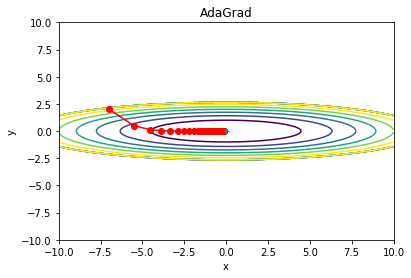

In [216]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizer = AdaGrad(lr=1.5)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]

for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])

    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)

draw_optimizing_graph(f, 'AdaGrad', x_history, y_history)

RMSProp

In [0]:
class RMSProp:
  def __init__(self, lr=0.01, decay_rate = 0.99):
    self.lr = lr
    self.decay_rate = decay_rate
    self.h = None
  
  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)
    for key in params.keys():
      self.h[key] *= self.decay_rate
      self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

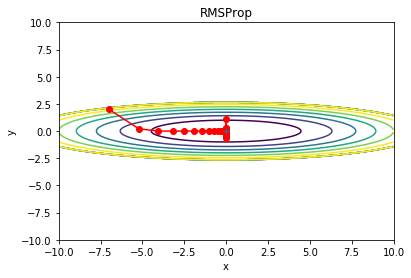

In [263]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizer = RMSProp(lr=0.8, decay_rate = 0.8)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]

for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])

    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)

draw_optimizing_graph(f, 'RMSProp', x_history, y_history)

### 6.1.6 Adam

In [0]:
class Adam:
  def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
    self.lr = lr
    self.beta1 = beta1
    self.beta2 = beta2
    self.iter = 0
    self.m = None
    self.v = None
  
  def update(self, params, grads):
    if self.m is None:
      self.m, self.v = {}, {}
      for key, val in params.items():
        self.m[key] = np.zeros_like(val)
        self.v[key] = np.zeros_like(val)
    self.iter += 1
    lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)
    for key in params.keys():
      self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
      self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
      params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

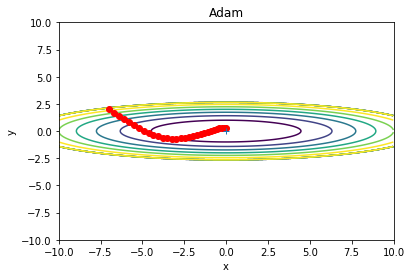

In [266]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizer = Adam(lr=0.3)
x_history = []
y_history = []
params['x'], params['y'] = init_pos[0], init_pos[1]

for i in range(30):
    x_history.append(params['x'])
    y_history.append(params['y'])

    grads['x'], grads['y'] = df(params['x'], params['y'])
    optimizer.update(params, grads)

draw_optimizing_graph(f, 'Adam', x_history, y_history)

### 6.1.8 MNISTデータセットによる更新手法の比較

In [0]:
class MultiLayerNet:
  def __init__(self, input_size, hidden_size_list, output_size, activation='relu', weight_init_std='relu', weight_decay_lambda=0):
    self.input_size = input_size
    self.output_size = output_size
    self.hidden_size_list = hidden_size_list
    self.hidden_layer_num = len(hidden_size_list)
    self.weight_decay_lambda = weight_decay_lambda
    self.params = {}
    
    self.__init_weight(weight_init_std)
    
    activation_layer = {'sigmoid': Sigmoid, 'relu': ReLU}
    self.layers = OrderedDict()
    for idx in range(1, self.hidden_layer_num+1):
      self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])
      self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
      
    idx = self.hidden_layer_num + 1
    self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])
    self.last_layer = SoftmaxWithLoss()
  
  def __init_weight(self, weight_init_std):
    """重みの初期値設定
    
    Parameters
    ----------
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
      'relu'または'he'を指定した場合は「Heの初期値」を設定
      'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    """
    all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
    for idx in range(1, len(all_size_list)):
      scale = weight_init_std
      if str(weight_init_std).lower() in ('relu', 'he'):
        scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLUを使う場合に推奨される初期値
      elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
        scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoidを使う場合に推奨される初期値
      self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
      self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)
    return x
    
  def loss(self, x, t):
    y = self.predict(x)
      
    weight_decay = 0
    for idx in range(1, self.hidden_layer_num + 2):
      W = self.params['W' + str(idx)]
      weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)
    return self.last_layer.forward(y, t) + weight_decay
    
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    if t.ndim != 1:
      t = np.argmax(t, axis=1)
    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy
    
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)
    grads = {}
    for idx in range(1, self.hidden_layer_num+2):
      grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
      grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])
    return grads
    
  def gradient(self, x, t):
    self.loss(x, t)
      
    dout = 1
    dout = self.last_layer.backward(dout)
      
    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)
    grads = {}
    for idx in range(1, self.hidden_layer_num + 2):
      grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
      grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db
    return grads

In [0]:
def smooth_curve(x):
  window_len = 11
  s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
  w = np.kaiser(window_len, 2)
  y = np.convolve(w/w.sum(), s, mode='valid')
  return y[5:len(y)-5]

===========iteration:0===========
SGD:2.34111969358
Momentum:2.35655619708
AdaGrad:2.0736972349
RMSProp:13.7223744569
Adam:2.20685480129
===========iteration:100===========
SGD:1.41746667866
Momentum:0.296656149962
AdaGrad:0.159011703652
RMSProp:0.362322148582
Adam:0.291725081915
===========iteration:200===========
SGD:0.712328197063
Momentum:0.227561716094
AdaGrad:0.0669061263998
RMSProp:0.112536689573
Adam:0.191826873931
===========iteration:300===========
SGD:0.646205792856
Momentum:0.272344563518
AdaGrad:0.129765219772
RMSProp:0.33911263452
Adam:0.200732275592
===========iteration:400===========
SGD:0.430891075457
Momentum:0.12723099122
AdaGrad:0.0569765508109
RMSProp:0.115876148258
Adam:0.0744021583716
===========iteration:500===========
SGD:0.375396003385
Momentum:0.114301120607
AdaGrad:0.0444161741752
RMSProp:0.0848987478498
Adam:0.0893061205123
===========iteration:600===========
SGD:0.234886475676
Momentum:0.0809034269171
AdaGrad:0.0361873514594
RMSProp:0.0856123999466
Adam:0.

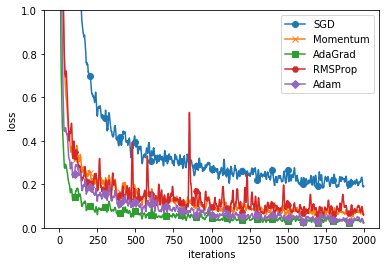

In [287]:
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['RMSProp'] = RMSProp()
optimizers['Adam'] = Adam()

networks = {}
train_loss = {}
for key in optimizers.keys():
  networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10)
  train_loss[key] = []

for i in range(max_iterations):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  
  for key in optimizers.keys():
    grads = networks[key].gradient(x_batch, t_batch)
    optimizers[key].update(networks[key].params, grads)
    
    loss = networks[key].loss(x_batch, t_batch)
    train_loss[key].append(loss)
    
  if i % 100 == 0:
    print( "===========" + "iteration:" + str(i) + "===========")
    for key in optimizers.keys():
      loss = networks[key].loss(x_batch, t_batch)
      print(key + ":" + str(loss))

markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "RMSProp": "H", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
  plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

RMSPropはパラメータの選択が上手く行っていない模様。

## 6.2 重みの初期値

### 6.2.2 隠れ層のアクティベーション分布

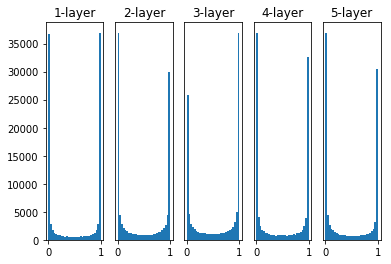

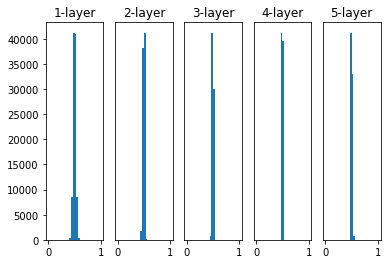

In [299]:
def weight_init_activation_histogram(activate, node_num, stddev):
  x = np.random.randn(1000, 100)
  hidden_layer_size = 5
  activations = {}

  for i in range(hidden_layer_size):
    if i != 0:
      x = activations[i - 1]
    w = np.random.randn(node_num, node_num) * stddev
  
    z = np.dot(x, w)
    a = activate(z)
    activations[i] = a

  for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i+1) + '-layer')
    if i != 0:
      plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0, 1))
  plt.show()

weight_init_activation_histogram(sigmoid, 100, 1)
weight_init_activation_histogram(sigmoid, 100, 0.01)

Xavirの初期値

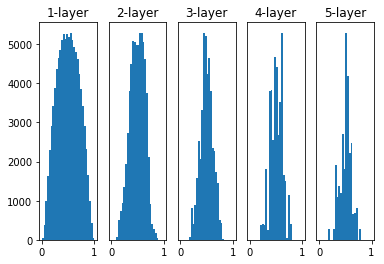

In [301]:
weight_init_activation_histogram(sigmoid, 100, 1.0 / np.sqrt(100))

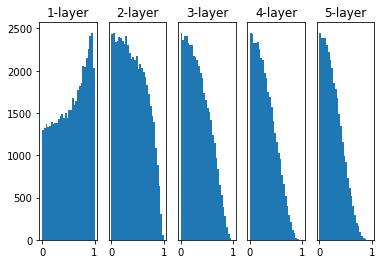

In [304]:
def tanh(x):
  return np.tanh(x)

weight_init_activation_histogram(tanh, 100, np.sqrt(1.0 / 100))

### 6.2.3 ReLUの場合の重みの初期値

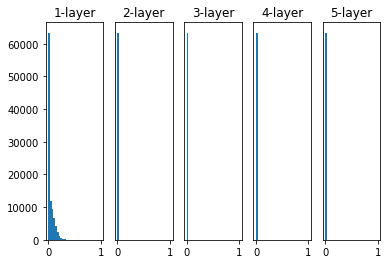

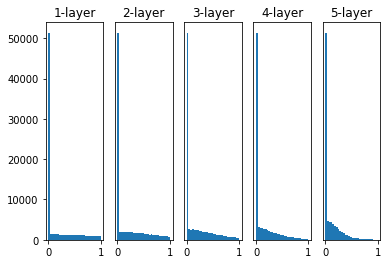

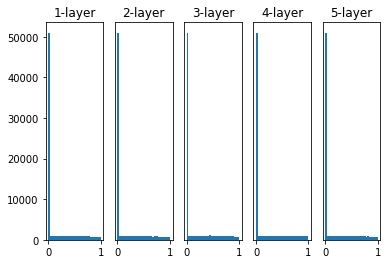

In [309]:
def relu(x):
  return np.maximum(0, x)

weight_init_activation_histogram(relu, 100, 0.01)
weight_init_activation_histogram(relu, 100, np.sqrt(1.0 / 100))
weight_init_activation_histogram(relu, 100, np.sqrt(2.0 / 100))

### 6.2.4 MNISTデータセットによる重み初期値の比較

===========iteration:0===========
std=0.01:2.30251935266
Xavier:2.30712157102
He:2.38540424838
===========iteration:100===========
std=0.01:2.30145694328
Xavier:2.25788525568
He:1.4028691032
===========iteration:200===========
std=0.01:2.30195356494
Xavier:2.21189823902
He:0.858845541942
===========iteration:300===========
std=0.01:2.30340469193
Xavier:2.01025920157
He:0.488359875444
===========iteration:400===========
std=0.01:2.30237059357
Xavier:1.65748834844
He:0.480839201613
===========iteration:500===========
std=0.01:2.30383335602
Xavier:1.28508652846
He:0.379753024364
===========iteration:600===========
std=0.01:2.30041093588
Xavier:0.964204020142
He:0.426736272662
===========iteration:700===========
std=0.01:2.30093851856
Xavier:0.601235235096
He:0.319597719008
===========iteration:800===========
std=0.01:2.30337211923
Xavier:0.415971605305
He:0.261325154886
===========iteration:900===========
std=0.01:2.3067455922
Xavier:0.422872866373
He:0.253701018619
===========iteration:1

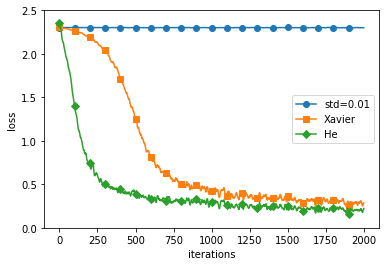

In [310]:
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
  networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100], output_size=10, weight_init_std=weight_type)
  train_loss[key] = []

for i in range(max_iterations):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]
  
  for key in weight_init_types.keys():
    grads = networks[key].gradient(x_batch, t_batch)
    optimizer.update(networks[key].params, grads)
    loss = networks[key].loss(x_batch, t_batch)
    train_loss[key].append(loss)
  
  if i % 100 == 0:
    print("===========" + "iteration:" + str(i) + "===========")
    for key in weight_init_types.keys():
      loss = networks[key].loss(x_batch, t_batch)
      print(key + ":" + str(loss))

markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
  plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

## 6.3 Batch Normalization
### 6.3.1 Batch Normalizationのアルゴリズム
$$
\mu_B \gets \frac{1}{m}\sum_{i=1}^{m}x_i
$$
$\mu_B$は平均
$$
\sigma_B^2 \gets \frac{1}{m}\sum_{i=1}^{m}(x_i - \mu_B)^2
$$
$\sigma_B^2$ば分散

$\sqrt{\sigma_B^2+\epsilon}$は標準偏差

$$
\hat{x_i} \gets \frac{x_i - \mu_B}{\sqrt{\sigma_B^2+\epsilon}}
$$
$\hat{x_i} \times 10 + 50$が偏差値。

### 6.3.2 Batch Normalizationの評価

In [0]:
class BatchNormalization:
  def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
    self.gamma = gamma
    self.beta = beta
    self.momentum = momentum
    self.input_shape = None # Conv層の場合は4次元、全結合層の場合は2次元

    # テスト時に使用する平均と分散
    self.running_mean = running_mean
    self.running_var = running_var

    # backward時に使用する中間データ
    self.batch_size = None
    self.xc = None
    self.std = None
    self.dgamma = None
    self.dbeta = None
    
  def forward(self, x, train_flg=True):
    self.input_shape = x.shape
    if x.ndim != 2:
      N, C, H, W = x.shape
      x = x.reshape(N, -1)
    out = self.__forward(x, train_flg)
    return out.reshape(*self.input_shape)
  
  def __forward(self, x, train_flg):
    if self.running_mean is None:
      N, D = x.shape
      self.running_mean = np.zeros(D)
      self.running_var = np.zeros(D)

    if train_flg:
      mu = x.mean(axis=0)
      xc = x - mu
      var = np.mean(xc**2, axis=0)
      std = np.sqrt(var + 10e-7)
      xn = xc / std

      self.batch_size = x.shape[0]
      self.xc = xc
      self.xn = xn
      self.std = std
      self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
      self.running_var = self.momentum * self.running_var + (1-self.momentum) * var
    else:
      xc = x - self.running_mean
      xn = xc / ((np.sqrt(self.running_var + 10e-7)))

    out = self.gamma * xn + self.beta
    return out
  
  def backward(self, dout):
    if dout.ndim != 2:
      N, C, H, W = dout.shape
      dout = dout.reshape(N, -1)
    dx = self.__backward(dout)
    dx = dx.reshape(*self.input_shape)
    return dx
  
  def __backward(self, dout):
    dbeta = dout.sum(axis=0)
    dgamma = np.sum(self.xn * dout, axis=0)
    dxn = self.gamma * dout
    dxc = dxn / self.std
    dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
    dvar = 0.5 * dstd / self.std
    dxc += (2.0 / self.batch_size) * self.xc * dvar
    dmu = np.sum(dxc, axis=0)
    dx = dxc - dmu / self.batch_size
    self.dgamma = dgamma
    self.dbeta = dbeta
    return dx

In [0]:
class MultiLayerNetExtend:
  """拡張版の全結合による多層ニューラルネットワーク

  Weiht Decay、Dropout、Batch Normalizationの機能を持つ

  Parameters
  ---------
  input_size : 入力サイズ（MNISTの場合は784）
  hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
  output_size : 出力サイズ（MNISTの場合は10）
  activation : 'relu' or 'sigmoid'
  weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
      'relu'または'he'を指定した場合は「Heの初期値」を設定
      'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
  weight_decay_lambda : Weight Decay（L2ノルム）の強さ
  use_dropout: Dropoutを使用するかどうか
  dropout_ration : Dropoutの割り合い
  use_batchNorm: Batch Normalizationを使用するかどうか
  """
  def __init__(self, input_size, hidden_size_list, output_size,
               activation='relu', weight_init_std='relu', weight_decay_lambda=0,
               use_dropout = False, dropout_ration = 0.5, use_batchnorm=False):
    self.input_size = input_size
    self.output_size = output_size
    self.hidden_size_list = hidden_size_list
    self.hidden_layer_num = len(hidden_size_list)
    self.use_dropout = use_dropout
    self.weight_decay_lambda = weight_decay_lambda
    self.use_batchnorm = use_batchnorm
    self.params = {}
    
    self.__init_weight(weight_init_std)
    
    activation_layer = {'sigmoid': Sigmoid, 'relu': ReLU}
    self.layers = OrderedDict()
    for idx in range(1, self.hidden_layer_num+1):
      self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                self.params['b' + str(idx)])
      if self.use_batchnorm:
        self.params['gamma' + str(idx)] = np.ones(hidden_size_list[idx-1])
        self.params['beta' + str(idx)] = np.zeros(hidden_size_list[idx-1])
        self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)], self.params['beta' + str(idx)])
      self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
      if self.use_dropout:
        self.layers['Dropout' + str(idx)] = Dropout(dropout_ration)
    idx = self.hidden_layer_num + 1
    self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])
    self.last_layer = SoftmaxWithLoss()
  
  def __init_weight(self, weight_init_std):
    """重みの初期値設定

    Parameters
    ----------
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    """
    all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
    for idx in range(1, len(all_size_list)):
      scale = weight_init_std
      if str(weight_init_std).lower() in ('relu', 'he'):
        scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLUを使う場合に推奨される初期値
      elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
        scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoidを使う場合に推奨される初期値
      self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
      self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

  def predict(self, x, train_flg=False):
    for key, layer in self.layers.items():
      if "Dropout" in key or "BatchNorm" in key:
        x = layer.forward(x, train_flg)
      else:
        x = layer.forward(x)
    return x
  
  def loss(self, x, t, train_flg=False):
    """損失関数を求める
    引数のxは入力データ、tは教師ラベル
    """
    y = self.predict(x, train_flg)
    weight_decay = 0
    for idx in range(1, self.hidden_layer_num + 2):
      W = self.params['W' + str(idx)]
      weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
    return self.last_layer.forward(y, t) + weight_decay
  
  def accuracy(self, X, T):
    Y = self.predict(X, train_flg=False)
    Y = np.argmax(Y, axis=1)
    if T.ndim != 1 :
      T = np.argmax(T, axis=1)
    accuracy = np.sum(Y == T) / float(X.shape[0])
    return accuracy
  
  def gradient(self, x, t):
    self.loss(x, t, train_flg=True)
    dout = 1
    dout = self.last_layer.backward(dout)
    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)
    grads = {}
    for idx in range(1, self.hidden_layer_num+2):
      grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.params['W' + str(idx)]
      grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db
      if self.use_batchnorm and idx != self.hidden_layer_num+1:
        grads['gamma' + str(idx)] = self.layers['BatchNorm' + str(idx)].dgamma
        grads['beta' + str(idx)] = self.layers['BatchNorm' + str(idx)].dbeta
    return grads

============== 1/16 ==============
epoch:0 | 0.117 - 0.102


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: overflow encountered in square
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in double_scalars
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less_equal
  


epoch:1 | 0.097 - 0.104
epoch:2 | 0.097 - 0.135
epoch:3 | 0.097 - 0.172
epoch:4 | 0.097 - 0.194
epoch:5 | 0.097 - 0.214
epoch:6 | 0.097 - 0.235
epoch:7 | 0.097 - 0.262
epoch:8 | 0.097 - 0.273
epoch:9 | 0.097 - 0.301
epoch:10 | 0.097 - 0.321
epoch:11 | 0.097 - 0.334
epoch:12 | 0.097 - 0.345
epoch:13 | 0.097 - 0.355
epoch:14 | 0.097 - 0.371
epoch:15 | 0.097 - 0.382
epoch:16 | 0.097 - 0.397
epoch:17 | 0.097 - 0.406
epoch:18 | 0.097 - 0.424


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.424
============== 2/16 ==============
epoch:0 | 0.097 - 0.094
epoch:1 | 0.097 - 0.085
epoch:2 | 0.097 - 0.107
epoch:3 | 0.097 - 0.125
epoch:4 | 0.097 - 0.139
epoch:5 | 0.097 - 0.157
epoch:6 | 0.097 - 0.186
epoch:7 | 0.097 - 0.209
epoch:8 | 0.097 - 0.233
epoch:9 | 0.097 - 0.259
epoch:10 | 0.097 - 0.293
epoch:11 | 0.097 - 0.306
epoch:12 | 0.097 - 0.32
epoch:13 | 0.097 - 0.35
epoch:14 | 0.097 - 0.376
epoch:15 | 0.097 - 0.397
epoch:16 | 0.097 - 0.422
epoch:17 | 0.097 - 0.441
epoch:18 | 0.097 - 0.461


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.476
============== 3/16 ==============
epoch:0 | 0.158 - 0.117
epoch:1 | 0.367 - 0.134
epoch:2 | 0.546 - 0.145
epoch:3 | 0.633 - 0.19
epoch:4 | 0.713 - 0.216
epoch:5 | 0.768 - 0.262
epoch:6 | 0.805 - 0.297
epoch:7 | 0.848 - 0.327
epoch:8 | 0.869 - 0.366
epoch:9 | 0.895 - 0.402
epoch:10 | 0.914 - 0.434
epoch:11 | 0.936 - 0.457
epoch:12 | 0.949 - 0.481
epoch:13 | 0.959 - 0.502
epoch:14 | 0.97 - 0.527
epoch:15 | 0.98 - 0.556
epoch:16 | 0.979 - 0.569
epoch:17 | 0.985 - 0.588
epoch:18 | 0.987 - 0.613


No handles with labels found to put in legend.


epoch:19 | 0.99 - 0.615
============== 4/16 ==============
epoch:0 | 0.114 - 0.079
epoch:1 | 0.3 - 0.083
epoch:2 | 0.419 - 0.137
epoch:3 | 0.525 - 0.213
epoch:4 | 0.588 - 0.294
epoch:5 | 0.645 - 0.363
epoch:6 | 0.673 - 0.431
epoch:7 | 0.711 - 0.478
epoch:8 | 0.731 - 0.513
epoch:9 | 0.746 - 0.56
epoch:10 | 0.765 - 0.601
epoch:11 | 0.784 - 0.628
epoch:12 | 0.796 - 0.653
epoch:13 | 0.821 - 0.684
epoch:14 | 0.832 - 0.692
epoch:15 | 0.836 - 0.715
epoch:16 | 0.836 - 0.736
epoch:17 | 0.86 - 0.741
epoch:18 | 0.862 - 0.76


No handles with labels found to put in legend.


epoch:19 | 0.863 - 0.776
============== 5/16 ==============
epoch:0 | 0.105 - 0.139
epoch:1 | 0.111 - 0.166
epoch:2 | 0.115 - 0.294
epoch:3 | 0.12 - 0.43
epoch:4 | 0.118 - 0.515
epoch:5 | 0.137 - 0.592
epoch:6 | 0.138 - 0.643
epoch:7 | 0.155 - 0.682
epoch:8 | 0.18 - 0.722
epoch:9 | 0.227 - 0.75
epoch:10 | 0.259 - 0.772
epoch:11 | 0.269 - 0.797
epoch:12 | 0.298 - 0.812
epoch:13 | 0.305 - 0.832
epoch:14 | 0.316 - 0.847
epoch:15 | 0.331 - 0.855
epoch:16 | 0.32 - 0.871
epoch:17 | 0.338 - 0.871
epoch:18 | 0.341 - 0.881


No handles with labels found to put in legend.


epoch:19 | 0.342 - 0.896
============== 6/16 ==============
epoch:0 | 0.118 - 0.117
epoch:1 | 0.114 - 0.173
epoch:2 | 0.097 - 0.441
epoch:3 | 0.125 - 0.591
epoch:4 | 0.116 - 0.673
epoch:5 | 0.116 - 0.731
epoch:6 | 0.116 - 0.76
epoch:7 | 0.116 - 0.789
epoch:8 | 0.119 - 0.816
epoch:9 | 0.146 - 0.852
epoch:10 | 0.119 - 0.864
epoch:11 | 0.116 - 0.872
epoch:12 | 0.116 - 0.888
epoch:13 | 0.122 - 0.896
epoch:14 | 0.118 - 0.907
epoch:15 | 0.148 - 0.919
epoch:16 | 0.164 - 0.922
epoch:17 | 0.166 - 0.938
epoch:18 | 0.118 - 0.946


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.951
============== 7/16 ==============
epoch:0 | 0.087 - 0.103
epoch:1 | 0.116 - 0.292
epoch:2 | 0.115 - 0.594
epoch:3 | 0.116 - 0.691
epoch:4 | 0.116 - 0.737
epoch:5 | 0.116 - 0.796
epoch:6 | 0.116 - 0.838
epoch:7 | 0.116 - 0.866
epoch:8 | 0.116 - 0.887
epoch:9 | 0.116 - 0.909
epoch:10 | 0.116 - 0.934
epoch:11 | 0.116 - 0.935
epoch:12 | 0.116 - 0.949
epoch:13 | 0.116 - 0.958
epoch:14 | 0.116 - 0.972
epoch:15 | 0.116 - 0.976
epoch:16 | 0.116 - 0.983
epoch:17 | 0.116 - 0.985
epoch:18 | 0.116 - 0.989


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.99
============== 8/16 ==============
epoch:0 | 0.087 - 0.138
epoch:1 | 0.116 - 0.414
epoch:2 | 0.116 - 0.623
epoch:3 | 0.116 - 0.683
epoch:4 | 0.116 - 0.737
epoch:5 | 0.116 - 0.821
epoch:6 | 0.116 - 0.873
epoch:7 | 0.116 - 0.908
epoch:8 | 0.116 - 0.922
epoch:9 | 0.116 - 0.945
epoch:10 | 0.116 - 0.96
epoch:11 | 0.116 - 0.969
epoch:12 | 0.116 - 0.98
epoch:13 | 0.116 - 0.988
epoch:14 | 0.116 - 0.995
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.999
============== 9/16 ==============
epoch:0 | 0.093 - 0.117
epoch:1 | 0.117 - 0.454
epoch:2 | 0.117 - 0.684
epoch:3 | 0.117 - 0.733
epoch:4 | 0.116 - 0.813
epoch:5 | 0.116 - 0.91
epoch:6 | 0.116 - 0.946
epoch:7 | 0.116 - 0.98
epoch:8 | 0.116 - 0.984
epoch:9 | 0.116 - 0.991
epoch:10 | 0.116 - 0.992
epoch:11 | 0.116 - 0.997
epoch:12 | 0.116 - 0.996
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.999
epoch:15 | 0.116 - 1.0
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.094 - 0.102
epoch:1 | 0.117 - 0.612
epoch:2 | 0.105 - 0.776
epoch:3 | 0.117 - 0.881
epoch:4 | 0.117 - 0.902
epoch:5 | 0.117 - 0.928
epoch:6 | 0.117 - 0.965
epoch:7 | 0.117 - 0.956
epoch:8 | 0.117 - 0.975
epoch:9 | 0.117 - 0.98
epoch:10 | 0.117 - 0.996
epoch:11 | 0.117 - 0.995
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.998
epoch:15 | 0.116 - 0.998
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.998
============== 11/16 ==============
epoch:0 | 0.117 - 0.23
epoch:1 | 0.117 - 0.514
epoch:2 | 0.117 - 0.776
epoch:3 | 0.117 - 0.77
epoch:4 | 0.116 - 0.876
epoch:5 | 0.117 - 0.935
epoch:6 | 0.117 - 0.96
epoch:7 | 0.117 - 0.954
epoch:8 | 0.116 - 0.973
epoch:9 | 0.117 - 0.944
epoch:10 | 0.117 - 0.981
epoch:11 | 0.117 - 0.986
epoch:12 | 0.117 - 0.99
epoch:13 | 0.117 - 0.99
epoch:14 | 0.116 - 0.955
epoch:15 | 0.116 - 0.989
epoch:16 | 0.116 - 0.991
epoch:17 | 0.116 - 0.994
epoch:18 | 0.116 - 0.993


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.994
============== 12/16 ==============
epoch:0 | 0.117 - 0.114
epoch:1 | 0.117 - 0.485
epoch:2 | 0.117 - 0.785
epoch:3 | 0.116 - 0.72
epoch:4 | 0.116 - 0.846
epoch:5 | 0.116 - 0.862
epoch:6 | 0.117 - 0.854
epoch:7 | 0.117 - 0.864
epoch:8 | 0.117 - 0.86
epoch:9 | 0.117 - 0.868
epoch:10 | 0.117 - 0.883
epoch:11 | 0.117 - 0.894
epoch:12 | 0.117 - 0.896
epoch:13 | 0.117 - 0.898
epoch:14 | 0.117 - 0.898
epoch:15 | 0.117 - 0.89
epoch:16 | 0.117 - 0.896
epoch:17 | 0.117 - 0.899
epoch:18 | 0.117 - 0.899


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.893
============== 13/16 ==============
epoch:0 | 0.117 - 0.202
epoch:1 | 0.117 - 0.51
epoch:2 | 0.117 - 0.457
epoch:3 | 0.117 - 0.563
epoch:4 | 0.117 - 0.592
epoch:5 | 0.117 - 0.635
epoch:6 | 0.117 - 0.618
epoch:7 | 0.117 - 0.607
epoch:8 | 0.117 - 0.599
epoch:9 | 0.117 - 0.631
epoch:10 | 0.117 - 0.68
epoch:11 | 0.117 - 0.703
epoch:12 | 0.117 - 0.662
epoch:13 | 0.117 - 0.693
epoch:14 | 0.117 - 0.701
epoch:15 | 0.117 - 0.707
epoch:16 | 0.117 - 0.815
epoch:17 | 0.117 - 0.883
epoch:18 | 0.117 - 0.899


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.9
============== 14/16 ==============
epoch:0 | 0.116 - 0.145
epoch:1 | 0.097 - 0.422
epoch:2 | 0.116 - 0.541
epoch:3 | 0.116 - 0.565
epoch:4 | 0.116 - 0.514
epoch:5 | 0.116 - 0.586
epoch:6 | 0.116 - 0.658
epoch:7 | 0.116 - 0.676
epoch:8 | 0.116 - 0.655
epoch:9 | 0.116 - 0.648
epoch:10 | 0.116 - 0.686
epoch:11 | 0.116 - 0.462
epoch:12 | 0.116 - 0.671
epoch:13 | 0.116 - 0.692
epoch:14 | 0.116 - 0.69
epoch:15 | 0.116 - 0.714
epoch:16 | 0.116 - 0.715
epoch:17 | 0.116 - 0.713
epoch:18 | 0.116 - 0.709


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.708
============== 15/16 ==============
epoch:0 | 0.116 - 0.087
epoch:1 | 0.116 - 0.371
epoch:2 | 0.116 - 0.392
epoch:3 | 0.116 - 0.446
epoch:4 | 0.116 - 0.471
epoch:5 | 0.116 - 0.482
epoch:6 | 0.117 - 0.484
epoch:7 | 0.117 - 0.489
epoch:8 | 0.117 - 0.495
epoch:9 | 0.117 - 0.493
epoch:10 | 0.117 - 0.492
epoch:11 | 0.117 - 0.499
epoch:12 | 0.117 - 0.499
epoch:13 | 0.117 - 0.498
epoch:14 | 0.117 - 0.498
epoch:15 | 0.117 - 0.593
epoch:16 | 0.117 - 0.595
epoch:17 | 0.117 - 0.593
epoch:18 | 0.117 - 0.603


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.603
============== 16/16 ==============
epoch:0 | 0.1 - 0.126
epoch:1 | 0.116 - 0.281
epoch:2 | 0.117 - 0.411
epoch:3 | 0.116 - 0.412
epoch:4 | 0.116 - 0.486
epoch:5 | 0.116 - 0.493
epoch:6 | 0.116 - 0.506
epoch:7 | 0.116 - 0.468
epoch:8 | 0.116 - 0.493
epoch:9 | 0.116 - 0.5
epoch:10 | 0.116 - 0.505
epoch:11 | 0.116 - 0.513
epoch:12 | 0.116 - 0.541
epoch:13 | 0.116 - 0.512
epoch:14 | 0.116 - 0.585
epoch:15 | 0.116 - 0.613
epoch:16 | 0.116 - 0.617
epoch:17 | 0.116 - 0.611
epoch:18 | 0.116 - 0.591
epoch:19 | 0.116 - 0.615


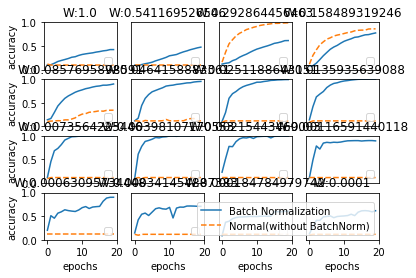

In [316]:
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

def __train(weight_init_std):
  bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                   weight_init_std=weight_init_std, use_batchnorm=True)
  network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
  optimizer = SGD(lr=learning_rate)
  
  train_acc_list = []
  bn_train_acc_list = []

  iter_per_epoch = max(train_size / batch_size, 1)
  epoch_cnt = 0

  for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for _network in (bn_network, network):
      grads = _network.gradient(x_batch, t_batch)
      optimizer.update(_network.params, grads)
      
    if i % iter_per_epoch == 0:
      train_acc = network.accuracy(x_train, t_train)
      bn_train_acc = bn_network.accuracy(x_train, t_train)
      train_acc_list.append(train_acc)
      bn_train_acc_list.append(bn_train_acc)
      
      print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
      
      epoch_cnt += 1
      if epoch_cnt >= max_epochs:
        break

  return train_acc_list, bn_train_acc_list

weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
  print( "============== " + str(i+1) + "/16" + " ==============")
  train_acc_list, bn_train_acc_list = __train(w)
  
  plt.subplot(4,4,i+1)
  plt.title("W:" + str(w))
  if i == 15:
    plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
    plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
  else:
    plt.plot(x, bn_train_acc_list, markevery=2)
    plt.plot(x, train_acc_list, linestyle="--", markevery=2)
  
  plt.ylim(0, 1.0)
  if i % 4:
    plt.yticks([])
  else:
    plt.ylabel("accuracy")
  
  if i < 12:
    plt.xticks([])
  else:
    plt.xlabel("epochs")
  plt.legend(loc='lower right')

plt.show()

## 正則化
### 6.4.1 過学習

In [0]:
def train_with_weight_decay(weight_decay_lambda=0):
  global x_train, t_train

  x_train = x_train[:300]
  t_train = t_train[:300]

  network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                         weight_decay_lambda=weight_decay_lambda)
  optimizer = SGD(lr=0.01)

  max_epochs = 201
  train_size = x_train.shape[0]
  batch_size = 100

  train_loss_list = []
  train_acc_list = []
  test_acc_list = []

  iter_per_epoch = max(train_size / batch_size, 1)
  epoch_cnt = 0

  for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
  
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
  
    if i % iter_per_epoch == 0:
      train_acc = network.accuracy(x_train, t_train)
      test_acc = network.accuracy(x_test, t_test)
      train_acc_list.append(train_acc)
      test_acc_list.append(test_acc)
  
      print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))
      epoch_cnt += 1
      if epoch_cnt >= max_epochs:
        break

  markers = {'train': 'o', 'test': 's'}
  x = np.arange(max_epochs)
  plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
  plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.ylim(0, 1.0)
  plt.legend(loc='lower right')
  plt.show()

epoch:0, train acc:0.0733333333333, test acc:0.0926
epoch:1, train acc:0.0766666666667, test acc:0.0968
epoch:2, train acc:0.0966666666667, test acc:0.103
epoch:3, train acc:0.103333333333, test acc:0.1097
epoch:4, train acc:0.11, test acc:0.1181
epoch:5, train acc:0.12, test acc:0.1234
epoch:6, train acc:0.146666666667, test acc:0.1324
epoch:7, train acc:0.166666666667, test acc:0.1396
epoch:8, train acc:0.193333333333, test acc:0.151
epoch:9, train acc:0.21, test acc:0.1621
epoch:10, train acc:0.233333333333, test acc:0.1768
epoch:11, train acc:0.266666666667, test acc:0.1891
epoch:12, train acc:0.273333333333, test acc:0.1959
epoch:13, train acc:0.28, test acc:0.212
epoch:14, train acc:0.32, test acc:0.2411
epoch:15, train acc:0.34, test acc:0.2638
epoch:16, train acc:0.366666666667, test acc:0.2797
epoch:17, train acc:0.383333333333, test acc:0.3013
epoch:18, train acc:0.423333333333, test acc:0.3293
epoch:19, train acc:0.433333333333, test acc:0.3334
epoch:20, train acc:0.44, test

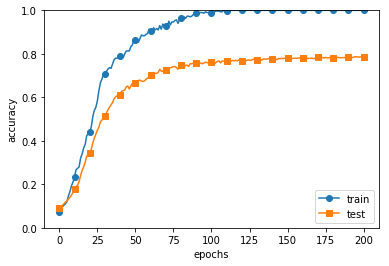

In [322]:
train_with_weight_decay(weight_decay_lambda=0)

### 6.4.2 Weight decay

epoch:0, train acc:0.126666666667, test acc:0.1396
epoch:1, train acc:0.13, test acc:0.1432
epoch:2, train acc:0.133333333333, test acc:0.148
epoch:3, train acc:0.153333333333, test acc:0.1508
epoch:4, train acc:0.166666666667, test acc:0.1529
epoch:5, train acc:0.193333333333, test acc:0.1586
epoch:6, train acc:0.216666666667, test acc:0.1736
epoch:7, train acc:0.236666666667, test acc:0.1827
epoch:8, train acc:0.246666666667, test acc:0.1913
epoch:9, train acc:0.28, test acc:0.2067
epoch:10, train acc:0.3, test acc:0.2223
epoch:11, train acc:0.303333333333, test acc:0.2437
epoch:12, train acc:0.333333333333, test acc:0.2579
epoch:13, train acc:0.36, test acc:0.2692
epoch:14, train acc:0.38, test acc:0.2862
epoch:15, train acc:0.383333333333, test acc:0.3055
epoch:16, train acc:0.406666666667, test acc:0.3243
epoch:17, train acc:0.44, test acc:0.3351
epoch:18, train acc:0.45, test acc:0.3412
epoch:19, train acc:0.446666666667, test acc:0.3445
epoch:20, train acc:0.473333333333, test a

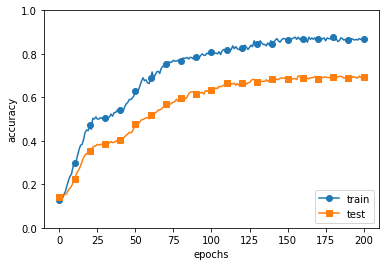

In [323]:
train_with_weight_decay(weight_decay_lambda=0.1)

### 6.4.3 Dropout

In [0]:
class Dropout:
  def __init__(self, dropout_ratio=0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None
  
  def forward(self, x, train_flg=True):
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    else:
      return x * (1.0 - self.dropout_ratio)
  
  def backward(self, dout):
    return dout * self.mask

In [0]:
class Trainer:
  def __init__(self, network, x_train, t_train, x_test, t_test,
               epochs=20, mini_batch_size=100,
               optimizer='SGD', optimizer_param={'lr':0.01},
               evaluate_sample_num_per_epoch=None, verbose=True):
    self.network = network
    self.verbose = verbose
    self.x_train = x_train
    self.t_train = t_train
    self.x_test = x_test
    self.t_test = t_test
    self.epochs = epochs
    self.batch_size = mini_batch_size
    self.evaluate_sample_num_per_epoch = evaluate_sample_num_per_epoch
    
    #optimizer_class_dict = {'sgd':SGD, 'momentum':Momentum, 'nesterov':Nesterov,
    #                        'adagrad':AdaGrad, 'rmsprpo':RMSprop, 'adam':Adam}
    optimizer_class_dict = {'sgd':SGD, 'momentum':Momentum, 'adagrad':AdaGrad,
                            'adam':Adam}
    self.optimizer = optimizer_class_dict[optimizer.lower()](**optimizer_param)
    
    self.train_size = x_train.shape[0]
    self.iter_per_epoch = max(self.train_size / mini_batch_size, 1)
    self.max_iter = int(epochs * self.iter_per_epoch)
    self.current_iter = 0
    self.current_epoch = 0
    
    self.train_loss_list = []
    self.train_acc_list = []
    self.test_acc_list = []
  
  def train_step(self):
    batch_mask = np.random.choice(self.train_size, self.batch_size)
    x_batch = self.x_train[batch_mask]
    t_batch = self.t_train[batch_mask]
    
    grads = self.network.gradient(x_batch, t_batch)
    self.optimizer.update(self.network.params, grads)
    
    loss = self.network.loss(x_batch, t_batch)
    self.train_loss_list.append(loss)
    if self.verbose:
      print("train loss:" + str(loss))
    if self.current_iter % self.iter_per_epoch == 0:
      self.current_epoch += 1
      
      x_train_sample, t_train_sample = self.x_train, self.t_train
      x_test_sample, t_test_sample = self.x_test, self.t_test
      if not self.evaluate_sample_num_per_epoch is None:
        t = self.evaluate_sample_num_per_epoch
        x_train_sample, t_train_sample = self.x_train[:t], self.t_train[:t]
        x_test_sample, t_test_sample = self.x_test[:t], self.t_test[:t]

      train_acc = self.network.accuracy(x_train_sample, t_train_sample)
      test_acc = self.network.accuracy(x_test_sample, t_test_sample)
      self.train_acc_list.append(train_acc)
      self.test_acc_list.append(test_acc)
      
      if self.verbose:
        print("=== epoch:" + str(self.current_epoch) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + " ===")
    self.current_iter += 1
  
  def train(self):
    for i in range(self.max_iter):
      self.train_step()
      
    test_acc = self.network.accuracy(self.x_test, self.t_test)
    if self.verbose:
      print("=============== Final Test Accuracy ===============")
      print("test acc:" + str(test_acc))

train loss:2.30945383401
=== epoch:1, train acc:0.12, test acc:0.1103 ===
train loss:2.32316972566
train loss:2.30522830293
train loss:2.30788815031
=== epoch:2, train acc:0.126666666667, test acc:0.1179 ===
train loss:2.29026307031
train loss:2.31096758157
train loss:2.31756317918
=== epoch:3, train acc:0.126666666667, test acc:0.1231 ===
train loss:2.30894587443
train loss:2.28904600912
train loss:2.28979225854
=== epoch:4, train acc:0.146666666667, test acc:0.1285 ===
train loss:2.27979655705
train loss:2.27891592668
train loss:2.29298377683
=== epoch:5, train acc:0.153333333333, test acc:0.1348 ===
train loss:2.29272153574
train loss:2.28276119915
train loss:2.28880998269
=== epoch:6, train acc:0.15, test acc:0.1425 ===
train loss:2.26645167224
train loss:2.28118419925
train loss:2.28421619165
=== epoch:7, train acc:0.146666666667, test acc:0.1459 ===
train loss:2.29054285816
train loss:2.2875105939
train loss:2.28788922509
=== epoch:8, train acc:0.15, test acc:0.1558 ===
train los

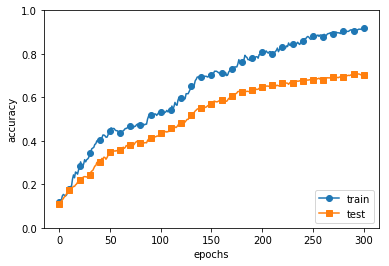

In [330]:
x_train = x_train[:300]
t_train = t_train[:300]

use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.15

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()
train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

301エポックが1分くらいで終わり、accuracyはまだ伸びているので、もう少しトレーニングを続けてみる。

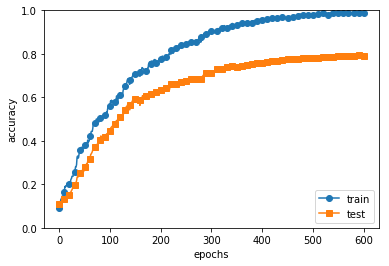

In [331]:
x_train = x_train[:300]
t_train = t_train[:300]

use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.15

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=601, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=False)
trainer.train()
train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

でも結局汎化性能に変化は無く、学習が遅くなっただけでは？

## 6.5 ハイパーパラメータの検証
### 6.5.1 検証データ

In [0]:
def shuffle_dataset(x, t):
  permutation = np.random.permutation(x.shape[0])
  x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
  t = t[permutation]
  return x, t

x_train, t_train = shuffle_dataset(x_train, t_train)

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 6.5.3 ハイパーパラメータ最適化の実装

In [0]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

In [0]:
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None
    self.y = None # softmaxの出力
    self.t = None # 教師データ

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)

    return self.loss

  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
      dx = (self.y - self.t) / batch_size
    else:
      dx = self.y.copy()
      dx[np.arange(batch_size), self.t] -= 1
      dx = dx / batch_size

    return dx

val acc:0.11 | lr:1.58254100165229e-06, weight decay:1.8824439453612664e-05
val acc:0.09 | lr:5.987680081638028e-06, weight decay:1.2339560166340517e-05
val acc:0.19 | lr:0.0002049769806554953, weight decay:8.729436264315267e-06
val acc:0.13 | lr:5.321824211399152e-05, weight decay:4.554402138797211e-06
val acc:0.53 | lr:0.0037100669337625713, weight decay:5.843916489328762e-08
val acc:0.72 | lr:0.008430642349359467, weight decay:8.66723385415032e-07
val acc:0.15 | lr:2.4529451822072915e-05, weight decay:4.6571205261953955e-08
val acc:0.1 | lr:3.120766078388888e-06, weight decay:7.766408793312868e-05
val acc:0.25 | lr:0.00156972100724452, weight decay:6.0408514127534294e-06
val acc:0.13 | lr:0.0013710626337962236, weight decay:9.553739743970988e-07
val acc:0.28 | lr:0.0018767419234315306, weight decay:4.9485688697629375e-08
val acc:0.06 | lr:1.1241690486026123e-05, weight decay:9.683555606374662e-05
val acc:0.1 | lr:4.067435525579397e-05, weight decay:4.90710443016296e-05
val acc:0.15 

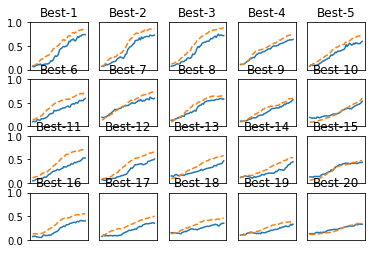

In [337]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:500]
t_train = t_train[:500]

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

def __train(lr, weight_decay, epocs=50):
  network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                          output_size=10, weight_decay_lambda=weight_decay)
  trainer = Trainer(network, x_train, t_train, x_val, t_val,
                    epochs=epocs, mini_batch_size=100,
                    optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
  trainer.train()
  return trainer.test_acc_list, trainer.train_acc_list

optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
  weight_decay = 10 ** np.random.uniform(-8, -4)
  lr = 10 ** np.random.uniform(-6, -2)
  
  val_acc_list, train_acc_list = __train(lr, weight_decay)
  print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
  key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
  results_val[key] = val_acc_list
  results_train[key] = train_acc_list

print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
  print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

  plt.subplot(row_num, col_num, i+1)
  plt.title("Best-" + str(i+1))
  plt.ylim(0.0, 1.0)
  if i % 5:
    plt.yticks([])
  plt.xticks([])
  x = np.arange(len(val_acc_list))
  plt.plot(x, val_acc_list)
  plt.plot(x, results_train[key], "--")
  i += 1

  if i >= graph_draw_num:
    break

plt.show()

# 7章 畳み込みニューラルネットワーク
## 7.4 Convolution/Poolingレイヤの実装
### 7.4.3 Convolutionレイヤの実装


In [0]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
  N, C, H, W = input_data.shape
  out_h = (H + 2*pad - filter_h)//stride + 1
  out_w = (W + 2*pad - filter_w)//stride + 1
  
  img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
  col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))
  
  for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
      x_max = x + stride*out_w
      col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

  col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
  return col

def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
  N, C, H, W = input_shape
  out_h = (H + 2*pad - filter_h)//stride + 1
  out_w = (W + 2*pad - filter_w)//stride + 1
  col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)
  
  img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
  for y in range(filter_h):
    y_max = y + stride*out_h
    for x in range(filter_w):
      x_max = x + stride*out_w
      img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]
  return img[:, :, pad:H + pad, pad:W + pad]

In [0]:
class Convolution:
  def __init__(self, W, b, stride=1, pad=0):
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad
    
    self.x = None
    self.col = None
    self.col_W = None
    
    self.dW = None
    self.db = None
  
  def forward(self, x):
    FN, C, FH, FW = self.W.shape
    N, C, H, W = x.shape
    out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
    out_w = 1 + int((W + 2*self.pad - FW) / self.stride)
    
    col = im2col(x, FH, FW, self.stride, self.pad)
    col_W = self.W.reshape(FN, -1).T
    
    out = np.dot(col, col_W) + self.b
    out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
    
    self.x = x
    self.col = col
    self.col_W = col_W
    
    return out
  
  def backward(self, dout):
    FN, C, FH, FW = self.W.shape
    dout = dout.transpose(0,2,3,1).reshape(-1, FN)
    
    self.db = np.sum(dout, axis=0)
    self.dW = np.dot(self.col.T, dout)
    self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)
    
    dcol = np.dot(dout, self.col_W.T)
    dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

    return dx

### 7.4.4 Poolingレイヤの実装

In [0]:
class Pooling:
  def __init__(self, pool_h, pool_w, stride=1, pad=0):
    self.pool_h = pool_h
    self.pool_w = pool_w
    self.stride = stride
    self.pad = pad

    self.x = None
    self.arg_max = None
    
  def forward(self, x):
    N, C, H, W = x.shape
    out_h = int(1 + (H - self.pool_h) / self.stride)
    out_w = int(1 + (W - self.pool_w) / self.stride)

    col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
    col = col.reshape(-1, self.pool_h*self.pool_w)

    arg_max = np.argmax(col, axis=1)
    out = np.max(col, axis=1)
    out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

    self.x = x
    self.arg_max = arg_max

    return out
  
  def backward(self, dout):
    dout = dout.transpose(0, 2, 3, 1)

    pool_size = self.pool_h * self.pool_w
    dmax = np.zeros((dout.size, pool_size))
    dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
    dmax = dmax.reshape(dout.shape + (pool_size,))

    dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
    dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)

    return dx

## 7.5 CNNの実装

In [0]:
class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    
    self.x = None
    self.original_x_shape = None
    
    self.dW = None
    self.db = None
    
  def forward(self, x):
    # テンソル対応
    self.original_x_shape = x.shape
    x = x.reshape(x.shape[0], -1)
    self.x = x
    
    out = np.dot(self.x, self.W) + self.b
    return out
  
  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)

    dx = dx.reshape(*self.original_x_shape)  # 入力データの形状に戻す（テンソル対応）
    return dx

In [0]:
class SimpleConvNet:
  def __init__(self, input_dim=(1, 28, 28),
               conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
               hidden_size=100, output_size=10, weight_init_std=0.01):
    filter_num = conv_param['filter_num']
    filter_size = conv_param['filter_size']
    filter_pad = conv_param['pad']
    filter_stride = conv_param['stride']
    input_size = input_dim[1]
    conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
    pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))
    
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
    self.params['b1'] = np.zeros(filter_num)
    self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
    self.params['b2'] = np.zeros(hidden_size)
    self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b3'] = np.zeros(output_size)

    self.layers = OrderedDict()
    self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                       conv_param['stride'], conv_param['pad'])
    self.layers['Relu1'] = ReLU()
    self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
    self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
    self.layers['Relu2'] = ReLU()
    self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
    
    self.last_layer = SoftmaxWithLoss()
    
  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)
    return x
  
  def loss(self, x, t):
    y = self.predict(x)
    return self.last_layer.forward(y, t)
  
  def accuracy(self, x, t, batch_size=100):
    if t.ndim != 1:
      t = np.argmax(t, axis=1)
    acc = 0.0
    for i in range(int(x.shape[0] / batch_size)):
      tx = x[i*batch_size:(i+1)*batch_size]
      tt = t[i*batch_size:(i+1)*batch_size]
      y = self.predict(tx)
      y = np.argmax(y, axis=1)
      acc += np.sum(y == tt)
    return acc / x.shape[0]
  
  def gradient(self, x, t):
    self.loss(x, t)
    
    dout = 1
    dout = self.last_layer.backward(dout)
    
    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    grads = {}
    grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
    grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
    grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
    
    return grads

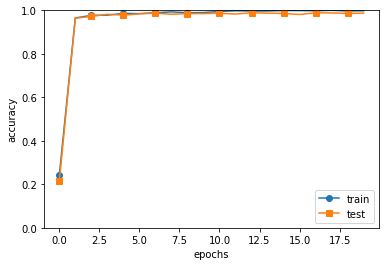

In [355]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

batch_size=100
max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=batch_size,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000, verbose=False)
trainer.train()

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()



## 7.6 CNNの可視化
### 7.6.1 １層目の重みの可視化

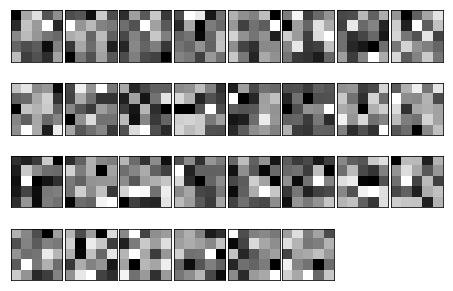

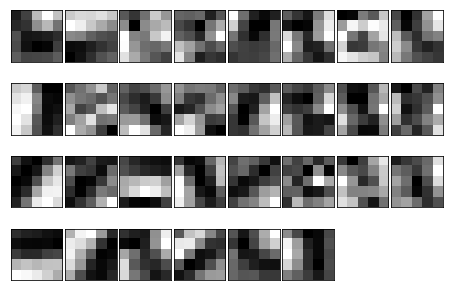

In [361]:
def filter_show(filters, nx=8, margin=3, scale=10):
  FN, C, FH, FW = filters.shape
  ny = int(np.ceil(FN / nx))
  
  fig = plt.figure()
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
  
  for i in range(FN):
    ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
  plt.show()

max_epochs = 4

network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

filter_show(network.params['W1'])

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=batch_size,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000, verbose=False)
trainer.train()

filter_show(network.params['W1'])

# ８章 ディープラーニング
## 8.1 ネットワークをより深く
### 8.1.1 よりディープなネットワークへ

In [0]:
class DeepConvNet:
  def __init__(self, input_dim=(1, 28, 28),
               conv_param_1 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1},
               conv_param_2 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1},
               conv_param_3 = {'filter_num':32, 'filter_size':3, 'pad':1, 'stride':1},
               conv_param_4 = {'filter_num':32, 'filter_size':3, 'pad':2, 'stride':1},
               conv_param_5 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
               conv_param_6 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
               hidden_size=50, output_size=10):
    pre_node_nums = np.array([1*3*3, 16*3*3, 16*3*3, 32*3*3, 32*3*3, 64*3*3, 64*4*4, hidden_size])
    weight_init_scales = np.sqrt(2.0 / pre_node_nums)  # ReLUを使う場合に推奨される初期値

    self.params = {}
    pre_channel_num = input_dim[0]
    for idx, conv_param in enumerate([conv_param_1, conv_param_2, conv_param_3, conv_param_4, conv_param_5, conv_param_6]):
      self.params['W' + str(idx+1)] = weight_init_scales[idx] * np.random.randn(conv_param['filter_num'], pre_channel_num, conv_param['filter_size'], conv_param['filter_size'])
      self.params['b' + str(idx+1)] = np.zeros(conv_param['filter_num'])
      pre_channel_num = conv_param['filter_num']
    self.params['W7'] = weight_init_scales[6] * np.random.randn(64*4*4, hidden_size)
    self.params['b7'] = np.zeros(hidden_size)
    self.params['W8'] = weight_init_scales[7] * np.random.randn(hidden_size, output_size)
    self.params['b8'] = np.zeros(output_size)
    
    self.layers = []
    self.layers.append(Convolution(self.params['W1'], self.params['b1'],
                       conv_param_1['stride'], conv_param_1['pad']))
    self.layers.append(ReLU())
    self.layers.append(Convolution(self.params['W2'], self.params['b2'],
                       conv_param_2['stride'], conv_param_2['pad']))
    self.layers.append(ReLU())
    self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
    self.layers.append(Convolution(self.params['W3'], self.params['b3'],
                       conv_param_3['stride'], conv_param_3['pad']))
    self.layers.append(ReLU())
    self.layers.append(Convolution(self.params['W4'], self.params['b4'],
                       conv_param_4['stride'], conv_param_4['pad']))
    self.layers.append(ReLU())
    self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
    self.layers.append(Convolution(self.params['W5'], self.params['b5'],
                       conv_param_5['stride'], conv_param_5['pad']))
    self.layers.append(ReLU())
    self.layers.append(Convolution(self.params['W6'], self.params['b6'],
                       conv_param_6['stride'], conv_param_6['pad']))
    self.layers.append(ReLU())
    self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
    self.layers.append(Affine(self.params['W7'], self.params['b7']))
    self.layers.append(ReLU())
    self.layers.append(Dropout(0.5))
    self.layers.append(Affine(self.params['W8'], self.params['b8']))
    self.layers.append(Dropout(0.5))
    
    self.last_layer = SoftmaxWithLoss()
  
  def predict(self, x, train_flg=False):
    for layer in self.layers:
      if isinstance(layer, Dropout):
        x = layer.forward(x, train_flg)
      else:
        x = layer.forward(x)
    return x
  
  def loss(self, x, t):
    y = self.predict(x, train_flg=True)
    return self.last_layer.forward(y, t)
  
  def accuracy(self, x, t, batch_size=100):
    if t.ndim != 1:
      t = np.argmax(t, axis=1)
    acc = 0.0
    for i in range(int(x.shape[0] / batch_size)):
      tx = x[i*batch_size:(i+1)*batch_size]
      tt = t[i*batch_size:(i+1)*batch_size]
      y = self.predict(tx, train_flg=False)
      y = np.argmax(y, axis=1)
      acc += np.sum(y == tt)
    return acc / x.shape[0]
  
  def gradient(self, x, t):
    self.loss(x, t)
    
    dout = 1
    dout = self.last_layer.backward(dout)
    
    tmp_layers = self.layers.copy()
    tmp_layers.reverse()
    for layer in tmp_layers:
      dout = layer.backward(dout)
    
    grads = {}
    for i, layer_idx in enumerate((0, 2, 5, 7, 10, 12, 15, 18)):
      grads['W' + str(i+1)] = self.layers[layer_idx].dW
      grads['b' + str(i+1)] = self.layers[layer_idx].db
    
    return grads

In [368]:
#num_epochs = 20
num_epochs = 4

network = DeepConvNet()
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=num_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr':0.001},
                  evaluate_sample_num_per_epoch=1000, verbose=False)
trainer.train()
print('Final acc: {}'.format(trainer.test_acc_list[-1]))


Final acc: 0.991
